# Outliers

In this example, we'll figure out how to flag outliers and look at several approaches for dealing with them.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

We'll use the wine data shown in the demo since there are several features with outliers we can take a look at.

In [2]:
X = pd.DataFrame.from_csv('app_demo/data/allwine.csv', index_col=None)
y = X.pop('quality')  # pop off the target
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1.0


It's easy to identify skewed features with a boxplot:

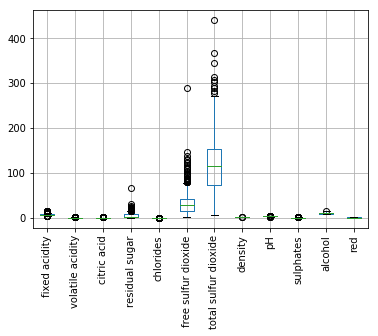

In [3]:
X.boxplot(rot=90)

This function will diagnose outliers.

In [4]:
def get_outlying_points(vec):
    q1, q3 = vec.quantile(0.25), vec.quantile(0.75)
    iqr = q3 - q1
    return np.asarray(
        vec[(vec < q1 - (1.5 * iqr)) | 
            (vec > q3 + (1.5 * iqr))].index.tolist())

In [5]:
x = X['free sulfur dioxide']
outliers = get_outlying_points(x)
outliers

array([1417, 1610, 1634, 1685, 1692, 1741, 1762, 1910, 1993, 2005, 2141,
       2422, 2773, 2783, 2847, 2909, 2920, 2981, 3292, 3294, 3494, 3527,
       3612, 3627, 3725, 3745, 3775, 3866, 3883, 4068, 4127, 4193, 4239,
       4315, 4363, 4373, 4490, 4491, 4495, 4581, 4729, 4997, 5186, 5267])

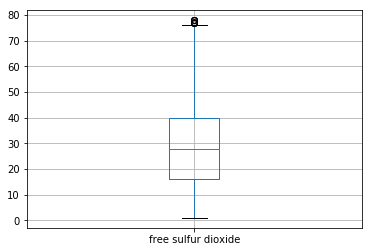

In [6]:
X.loc[~X.index.isin(outliers)][['free sulfur dioxide']].boxplot()

Let's dig into one of these...

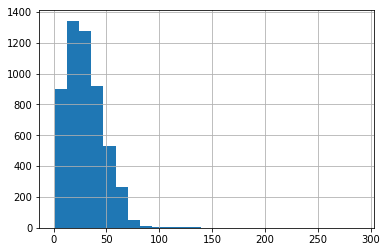

In [7]:
x.hist(bins=25)

We might be able to log transform this!

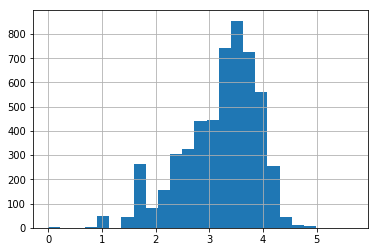

In [8]:
logged = x.apply(lambda v: np.log(v))
logged.hist(bins=25)